In [1]:
import sys
sys.path.append('../..')

## Load data

In [2]:
from src.dataset.static2dynamic import Pedar_Dataset_static2dynamic

pedar = Pedar_Dataset_static2dynamic(
    pedar_static='../../data/processed/pedar_static.pkl',
    pedar_dynamic='../../data/processed/pedar_dynamic.pkl',
)

In [4]:
pedar.load_foot_mask('../../data/processed/left_foot_mask.png')
pedar.l_index

{0: (array([739, 740, 740, ..., 794, 794, 795]),
  array([188, 142, 143, ..., 151, 152, 151])),
 1: (array([740, 740, 740, ..., 804, 804, 805]),
  array([119, 120, 121, ..., 123, 124, 121])),
 2: (array([740, 740, 740, ..., 804, 804, 805]),
  array([ 96,  97,  98, ..., 120, 121,  97])),
 3: (array([740, 740, 740, ..., 804, 804, 805]),
  array([73, 74, 75, ..., 97, 98, 98])),
 4: (array([740, 740, 740, ..., 794, 794, 795]),
  array([26, 27, 28, ..., 68, 69, 69])),
 5: (array([677, 677, 677, ..., 739, 739, 739]),
  array([175, 176, 177, ..., 185, 186, 187])),
 6: (array([676, 676, 676, ..., 739, 739, 739]),
  array([149, 150, 151, ..., 161, 162, 163])),
 7: (array([675, 675, 675, ..., 739, 739, 739]),
  array([122, 123, 124, ..., 138, 139, 140])),
 8: (array([675, 675, 675, ..., 739, 739, 739]),
  array([ 95,  96,  97, ..., 116, 117, 118])),
 9: (array([675, 675, 675, ..., 739, 739, 740]),
  array([71, 72, 73, ..., 94, 95, 95])),
 10: (array([675, 675, 675, ..., 739, 739, 739]),
  array(

In [5]:
pedar.r_index

{99: (array([739, 740, 740, ..., 794, 794, 795]),
  array([114, 114, 115, ..., 150, 151, 151])),
 100: (array([740, 740, 740, ..., 804, 804, 805]),
  array([161, 162, 163, ..., 179, 180, 181])),
 101: (array([740, 740, 740, ..., 804, 804, 805]),
  array([184, 185, 186, ..., 202, 203, 205])),
 102: (array([740, 740, 740, ..., 804, 804, 805]),
  array([208, 209, 210, ..., 206, 207, 204])),
 103: (array([740, 740, 740, ..., 794, 794, 795]),
  array([230, 231, 232, ..., 233, 234, 233])),
 104: (array([677, 677, 677, ..., 739, 739, 739]),
  array([101, 102, 103, ..., 136, 137, 138])),
 105: (array([676, 676, 676, ..., 739, 739, 739]),
  array([130, 131, 132, ..., 159, 160, 161])),
 106: (array([675, 675, 675, ..., 739, 739, 739]),
  array([155, 156, 157, ..., 181, 182, 183])),
 107: (array([675, 675, 675, ..., 739, 739, 739]),
  array([181, 182, 183, ..., 204, 205, 206])),
 108: (array([675, 675, 675, ..., 739, 739, 740]),
  array([208, 209, 210, ..., 229, 230, 207])),
 109: (array([675, 67

## Extract common contact area

### Filtered counts approach

In [6]:
count = (pedar.pedar_static > 20).sum()
count

1       26
2      184
3      244
4      258
5      225
      ... 
194     55
195     78
196     62
197     70
198     16
Length: 198, dtype: int64

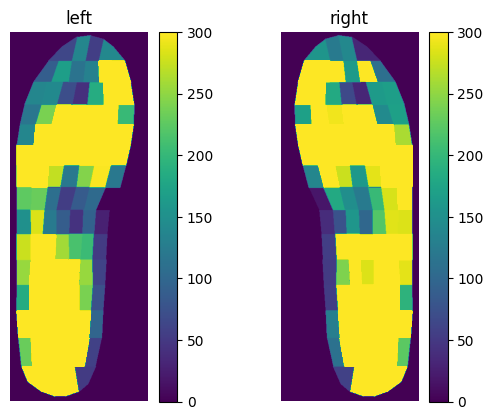

In [7]:
pedar.draw_heatmap(
    count / count.max(),
    '../../data/processed/left_foot_mask.png',
    vmax=count.max(),
)

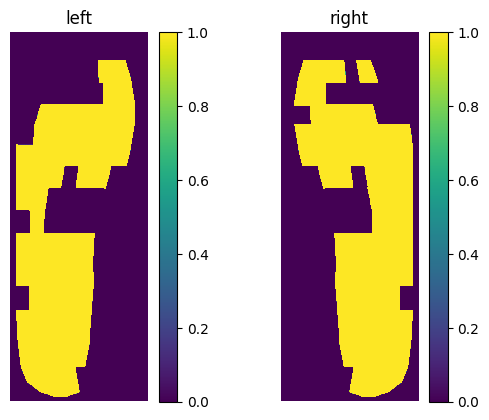

In [8]:
pedar.draw_heatmap(
    (count >= 100) * 1.0,
    vmax=1,
)

In [9]:
import numpy as np

sensors = np.where(count >= 100)[0]
sensors

array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  13,  14,  15,
        16,  17,  18,  20,  21,  22,  23,  24,  27,  28,  29,  30,  31,
        32,  34,  35,  36,  37,  38,  39,  45,  52,  53,  55,  56,  58,
        59,  60,  61,  62,  63,  64,  65,  66,  67,  68,  69,  70,  71,
        72,  73,  75,  76,  77,  78,  79,  80,  82,  83,  89,  90, 100,
       101, 102, 103, 105, 106, 107, 108, 109, 110, 112, 113, 114, 115,
       116, 117, 119, 120, 121, 122, 123, 126, 127, 128, 129, 130, 131,
       133, 134, 135, 136, 137, 138, 143, 144, 145, 150, 151, 152, 154,
       155, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 175, 176, 177, 178, 181, 182, 188, 189,
       190, 192])

### Filter mean approach

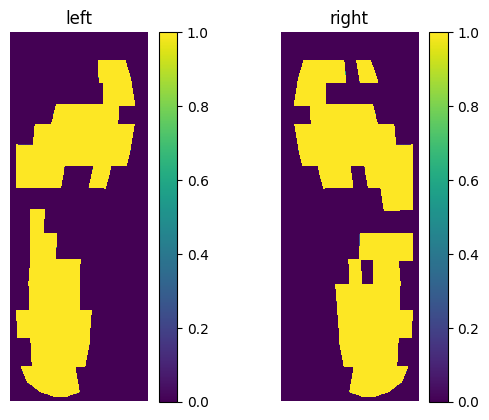

In [10]:
mean = pedar.pedar_static.mean()

threads_hold = 20

pedar.draw_heatmap(
    (mean > threads_hold) * 1.0,
    '../../data/processed/left_foot_mask.png',
    vmax=1,
)

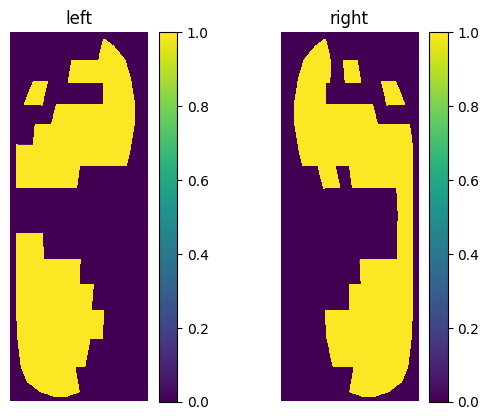

In [11]:
mean = pedar.pedar_dynamic.mean()

threads_hold = 45

pedar.draw_heatmap(
    (mean > threads_hold) * 1.0,
    '../../data/processed/left_foot_mask.png',
    vmax=1,
)

In [12]:
sensors = np.where(mean > threads_hold)[0]
sensors

array([  1,   2,   3,   4,   6,   7,   8,   9,  10,  11,  12,  13,  14,
        15,  16,  17,  18,  20,  21,  22,  23,  24,  25,  28,  29,  30,
        31,  32,  38,  39,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  75,  76,  77,  78,  79,
        82,  83,  88,  89,  90,  91,  92,  95, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       120, 121, 122, 123, 124, 128, 129, 130, 131, 138, 145, 152, 154,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 181, 182, 187,
       188, 189, 191, 194])

## Export common contact points

In [13]:
l_contact = []
r_contact = []

for sensor in sensors:
    if sensor <= 99:
        l_contact.append(np.array(pedar.l_index[sensor]).T)
    else:
        r_contact.append(np.array(pedar.r_index[sensor]).T)

In [14]:
points_l_contact = np.concatenate(l_contact)
points_r_contact = np.concatenate(r_contact)
points_l_contact.shape, points_r_contact.shape

((94455, 2), (96804, 2))

In [15]:
np.save('../../data/processed/points_l_contact.npy', points_l_contact)
np.save('../../data/processed/points_r_contact.npy', points_r_contact)